In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import xarray as xr
import sys
import os

In [34]:
Subjects=os.listdir('ASCIIfiles/')


later participants

test_pic_screen  in first half

rating_pic_screen to separat trials in second half


In [12]:
np.array(Subjects)

array(['10irsa98.asc', '11dasc94.asc', '11maan95.asc', '14male93.asc',
       '15fasc96.asc', '16mabe96.asc', '17leob96.asc', '18kebe94.asc',
       '19lahe98.asc', '20lohe97.asc', '21imst96.asc', '22mikv95.asc',
       '23jaka88.asc', '24jawo96.asc', '25jabi98.asc', '26jaed98.asc',
       '27dast96.asc', '28jefu91.asc', '29jeko92.asc', '30thre94.asc',
       '31viba97.asc', '32fadr97.asc', '33most97.asc', '34mawi94.asc',
       '36phja95.asc', '37rohi97.asc', '38phka98.asc', '39damo96.asc',
       '40yadi95.asc', '41dasc94.asc', '42dare97.asc', '52ishu97.asc',
       '53sako98.asc', '54saed93.asc', '55sibr94.asc', '56anzu97.asc',
       '57andu98.asc', '58aldr98.asc', '59vaau97.asc', '60issc98.asc',
       '61kamu98.asc', '62jawa98.asc', '63safe95.asc', '64luvo99.asc',
       '65kasp94.asc', '66lope99.asc', '67lele97.asc', '68pezi97.asc',
       '8robr96.asc', 'anfi90.asc', 'angￃﾤ97.asc', 'aysa96.asc',
       'bera96.asc', 'bimi98.asc', 'capo98.asc', 'clsc97.asc',
       'dari98.asc',

In [13]:
NS=len(Subjects)
print(NS)

83


In [5]:
len('key_response_time_VARIABLE')

26

In [6]:
fixcheck_one_VARIABLE 1
fixcheck_two_VARIABLE 0

SyntaxError: invalid syntax (Temp/ipykernel_13056/2007852692.py, line 1)


display_on_time_VARIABLE     # when trial is starting
key_response_time_VARIABLE   #
responsetime_VARIABLE #

pic_screen changes is the respsonse time! (as the next image  is being prepared to be shown)
trial_index_var is good getting the start of the trials.  switches when trial starts

In [7]:
def GetTrials(DataTab):   
    xx=DataTab['xpos'][DataTab['time']=='MSG']
    StimulusB1=[]
    StimulusB2=[]
    CutPos1=[]
    CutPos2=[]
    PosTrialIndex=[]
    TrialIndexVar=[]
    PosQuesTrial=[]
    FixCrossTimes=[]
    QuestionTrialIndex=[]
    Disptimes=[]
    Resptimes=[]
    
    for cx,x in enumerate(xx):
  #  if cx<5000:
        if x.find('pic_screen')!=-1:
            if x.find('rating_pic_screen')!=-1:
                StimulusB2.append(x[x.find('screen')+7:])
                CutPos2.append(int(x[0:x.find(' ')]))
            if x.find(' pic_screen')!=-1:
                CutPos1.append(int(x[0:x.find(' ')]))
                StimulusB1.append(x[x.find('screen')+7:])
        if x.find('trial_index_')!=-1:
            #print(cx,x)
            if x.find('question_trial_index')!=-1:
                PosQuesTrial.append(int(x[0:x.find(' ')]))
                QuestionTrialIndex.append(int(x[x.find('trial_index_')+21:]))    
            else:
                PosTrialIndex.append(int(x[0:x.find(' ')]))
                TrialIndexVar.append(int(x[x.find('trial_index_')+21:]))
                
        if x.find('fix cross')!=-1 and x.find('screen')==-1:
            FirstSpace=x.find(' ')
            FixCrossTimes.append(int(x[:FirstSpace]))
            
        if x.find('display_on_time_VARIABLE')!=-1:
            Disptimes.append(np.float64(x[x.find('display_on_time_VARIABLE')+24:]))
        if x.find('key_response_time_VARIABLE')!=-1:
            Resptimes.append(np.float64(x[x.find('key_response_time_VARIABLE')+26:]))
        
    CutPos1=np.array(CutPos1)
    CutPos2=np.array(CutPos2)

    StimulusB1=np.array(StimulusB1)
    StimulusB2=np.array(StimulusB2)

    PosTrialIndex=np.array(PosTrialIndex)
    TrialIndexVar=np.array(TrialIndexVar)
    QuestionTrialIndex=np.array(QuestionTrialIndex)
    PosQuesTrial=np.array(PosQuesTrial)
    FixCrossTimes=np.array(FixCrossTimes)
    
    return CutPos1,CutPos2,StimulusB1,StimulusB2,PosTrialIndex,TrialIndexVar,QuestionTrialIndex,PosQuesTrial,FixCrossTimes,Resptimes,Disptimes



participants to exclude  (wrong data file exported)

'thwo96'

In [72]:
for cs,s in enumerate(Subjects):

    Filename='ASCIIfiles/'+s
    Tab=pd.read_csv(Filename,skiprows=np.arange(1,79),sep='\t',error_bad_lines=False,names=['time', 'xpos', 'ypos', 'pupil', 'various', 'stuff'])  
    xx=Tab['xpos'][Tab['time']=='MSG']
    Found=0
    for cx,x in enumerate(xx):
        if x.find('rating_pic_screen')!=-1:
            Found=1
    if Found==1:
        print('Found',cs,s)
    else:
        print('Not found',cs,s)
    if s=='bimi98.asc' or s=='10irsa98.asc':
        xx.to_csv(s[0:-4]+'.csv')
                      
                      
  

Found 0 10irsa98.asc
Found 1 11dasc94.asc
Found 2 11maan95.asc
Found 3 14male93.asc
Found 4 15fasc96.asc
Found 5 16mabe96.asc
Found 6 17leob96.asc
Found 7 18kebe94.asc
Found 8 19lahe98.asc
Found 9 20lohe97.asc
Found 10 21imst96.asc
Found 11 22mikv95.asc
Found 12 23jaka88.asc
Found 13 24jawo96.asc
Found 14 25jabi98.asc
Found 15 26jaed98.asc
Found 16 27dast96.asc
Found 17 28jefu91.asc
Found 18 29jeko92.asc
Found 19 30thre94.asc
Found 20 31viba97.asc
Found 21 32fadr97.asc
Found 22 33most97.asc
Found 23 34mawi94.asc
Found 24 36phja95.asc
Found 25 37rohi97.asc
Found 26 38phka98.asc
Found 27 39damo96.asc
Found 28 40yadi95.asc
Found 29 41dasc94.asc
Found 30 42dare97.asc
Found 31 52ishu97.asc
Found 32 53sako98.asc
Found 33 54saed93.asc
Found 34 55sibr94.asc
Found 35 56anzu97.asc
Found 36 57andu98.asc
Found 37 58aldr98.asc
Found 38 59vaau97.asc
Found 39 60issc98.asc
Found 40 61kamu98.asc
Found 41 62jawa98.asc
Found 42 63safe95.asc
Found 43 64luvo99.asc
Found 44 65kasp94.asc
Found 45 66lope99.as

In [38]:
np.sum(TabSel['time']=='MSG')

C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


0

 error= 'addi94.asc'  (index =49)

In [66]:
#PosQuesTrial[np.argmax(QuestionTrialIndex)]


NTr=30

Trials=np.arange(1,NTr+1)
TrialEndsAll=np.zeros((NS,NTr))

TrialStartsAll=np.zeros((NS,NTr))

LengthsBlock1=np.zeros(NS)
LengthsBlock2=np.zeros(NS)


PupilAll=np.zeros(NS,dtype=object)
TimesAll=np.zeros(NS,dtype=object)
RespTimesAll=np.zeros((NS,NTr))
FilterRatio=np.zeros(NS)   
GoodS=40

FixCrossTimesAll=[]

0 10irsa98.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (472593, 6) Row size:  (484632, 6)
Len block1:  249.898  sec
1 11dasc94.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (419000, 6) Row size:  (429202, 6)
Len block1:  133.074  sec
2 11maan95.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (297382, 6) Row size:  (305531, 6)
Len block1:  158.125  sec
3 14male93.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (508007, 6) Row size:  (519309, 6)
Len block1:  224.218  sec
4 15fasc96.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (567784, 6) Row size:  (580581, 6)
Len block1:  267.414  sec
5 16mabe96.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (550107, 6) Row size:  (562289, 6)
Len block1:  506.469  sec
6 17leob96.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (491242, 6) Row size:  (503223, 6)
Len block1:  299.704  sec
7 18kebe94.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (415087, 6) Row size:  (425528, 6)
Len block1:  300.562  sec
8 19lahe98.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (612937, 6) Row size:  (627151, 6)
Len block1:  557.959  sec
9 20lohe97.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (538784, 6) Row size:  (551081, 6)
Len block1:  284.152  sec
10 21imst96.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (485290, 6) Row size:  (496532, 6)
Len block1:  237.324  sec
11 22mikv95.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (571888, 6) Row size:  (585503, 6)
Len block1:  355.817  sec
12 23jaka88.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (446512, 6) Row size:  (457553, 6)
Len block1:  178.599  sec
13 24jawo96.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (514677, 6) Row size:  (526197, 6)
Len block1:  308.174  sec
14 25jabi98.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (547896, 6) Row size:  (560277, 6)
Len block1:  372.986  sec
15 26jaed98.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (534822, 6) Row size:  (546977, 6)
Len block1:  445.48  sec
16 27dast96.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (417327, 6) Row size:  (427426, 6)
Len block1:  216.268  sec
17 28jefu91.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (530489, 6) Row size:  (542826, 6)
Len block1:  361.656  sec
18 29jeko92.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (375055, 6) Row size:  (385422, 6)
Len block1:  85.849  sec
19 30thre94.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (380888, 6) Row size:  (392174, 6)
Len block1:  211.493  sec
20 31viba97.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (523524, 6) Row size:  (537077, 6)
Len block1:  518.867  sec
21 32fadr97.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

Filtered size:  (509176, 6) Row size:  (521417, 6)
Len block1:  249.769  sec
22 33most97.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (407017, 6) Row size:  (417686, 6)
Len block1:  254.501  sec
23 34mawi94.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (373167, 6) Row size:  (383708, 6)
Len block1:  87.33  sec
24 36phja95.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (655763, 6) Row size:  (670056, 6)
Len block1:  406.287  sec
25 37rohi97.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (489026, 6) Row size:  (499793, 6)
Len block1:  251.518  sec
26 38phka98.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (747509, 6) Row size:  (762876, 6)
Len block1:  697.995  sec
27 39damo96.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (432056, 6) Row size:  (442321, 6)
Len block1:  132.787  sec
28 40yadi95.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (416291, 6) Row size:  (428072, 6)
Len block1:  124.092  sec
29 41dasc94.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (468763, 6) Row size:  (479914, 6)
Len block1:  269.618  sec
30 42dare97.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (441645, 6) Row size:  (453802, 6)
Len block1:  166.496  sec
31 52ishu97.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (559767, 6) Row size:  (572537, 6)
Len block1:  222.766  sec
32 53sako98.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (495334, 6) Row size:  (506806, 6)
Len block1:  332.023  sec
33 54saed93.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (438100, 6) Row size:  (448973, 6)
Len block1:  183.111  sec
34 55sibr94.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (389283, 6) Row size:  (399442, 6)
Len block1:  95.342  sec
35 56anzu97.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (495891, 6) Row size:  (508203, 6)
Len block1:  409.054  sec
36 57andu98.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (462893, 6) Row size:  (474967, 6)
Len block1:  269.644  sec
37 58aldr98.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (390162, 6) Row size:  (400716, 6)
Len block1:  255.337  sec
38 59vaau97.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (433612, 6) Row size:  (443954, 6)
Len block1:  158.709  sec
39 60issc98.asc


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Filtered size:  (465976, 6) Row size:  (478199, 6)
Len block1:  283.76  sec


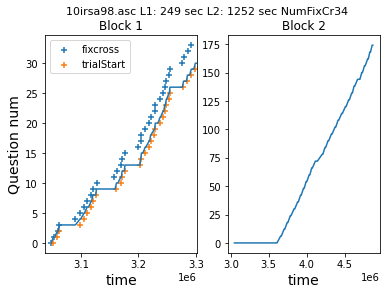

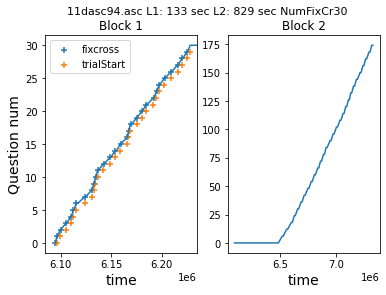

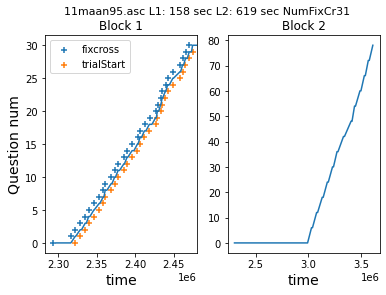

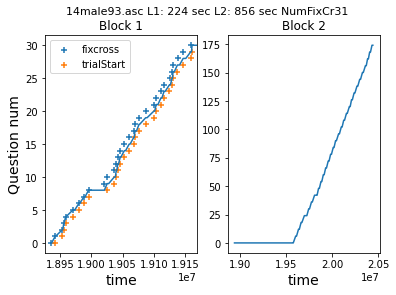

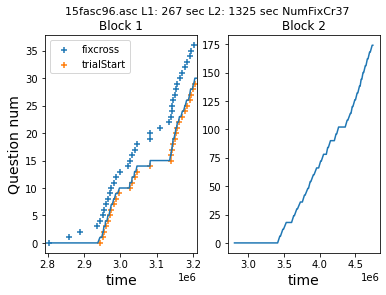

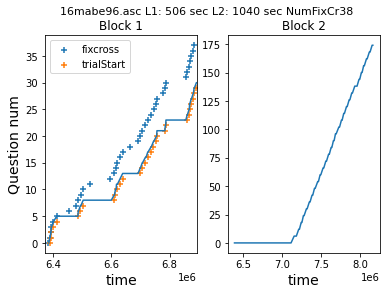

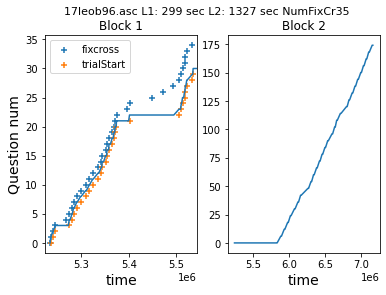

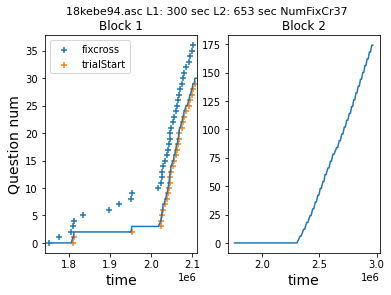

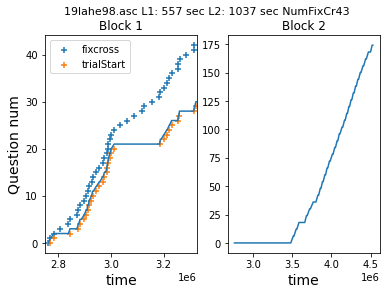

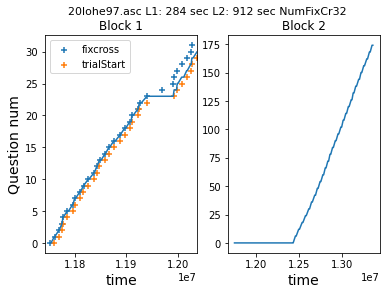

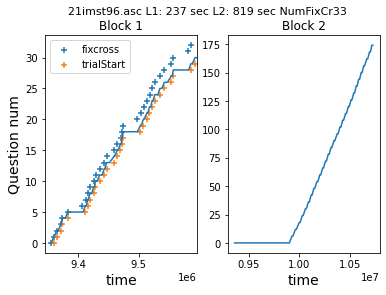

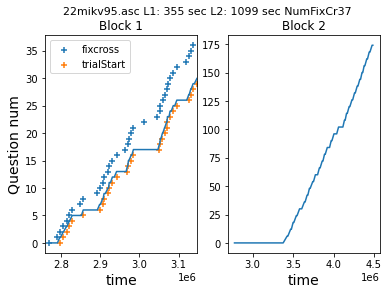

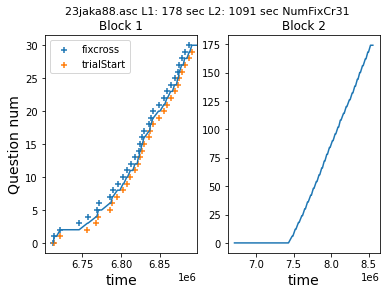

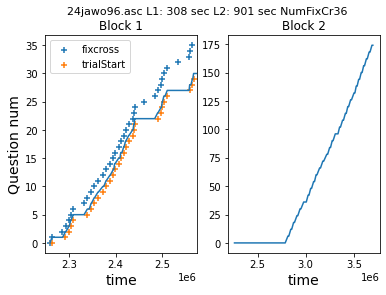

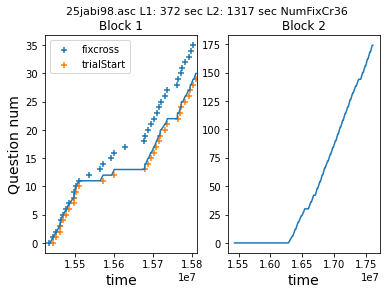

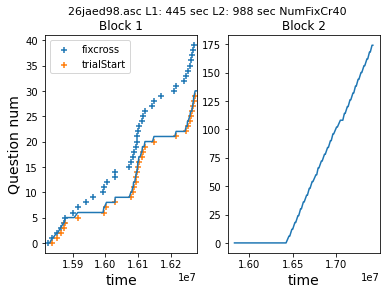

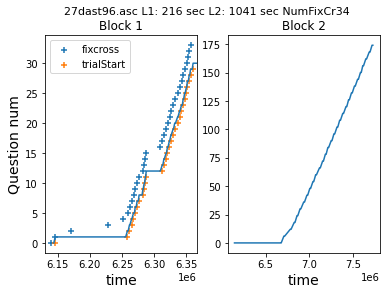

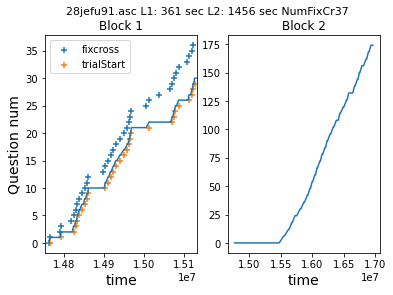

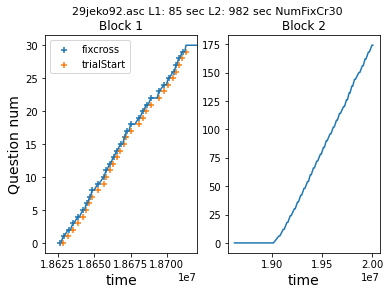

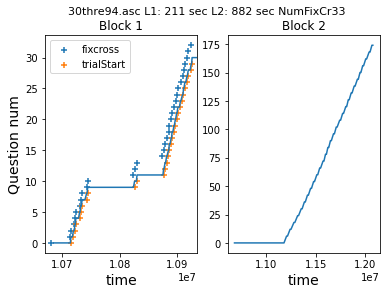

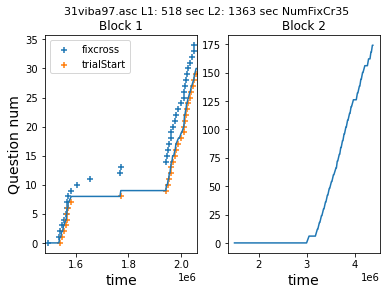

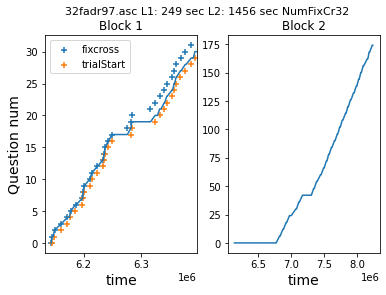

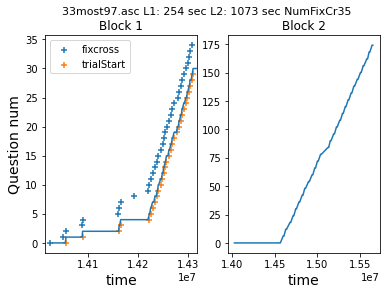

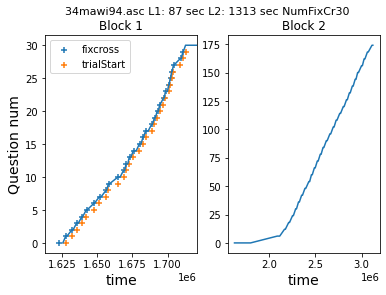

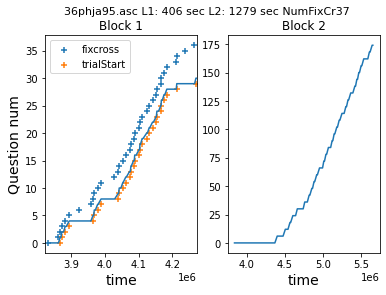

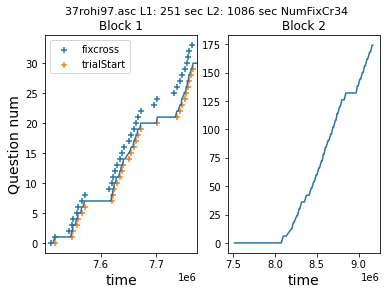

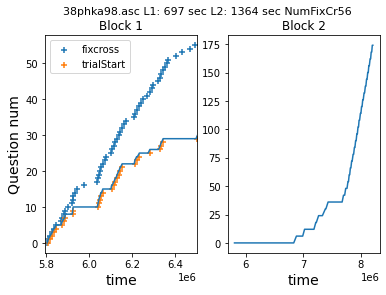

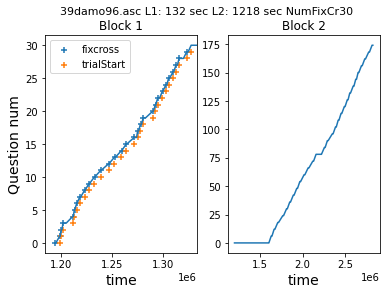

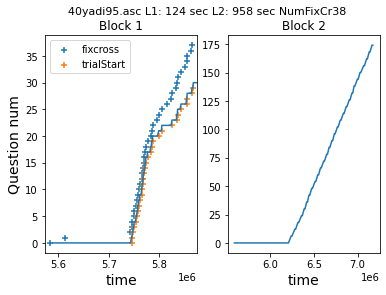

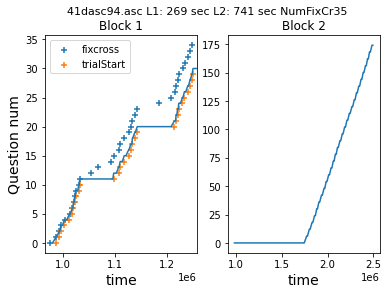

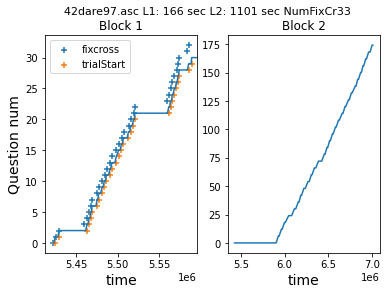

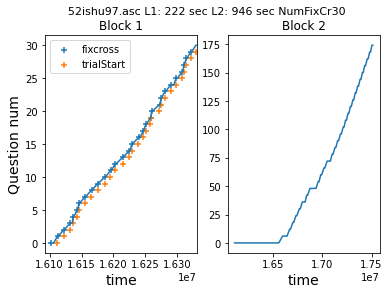

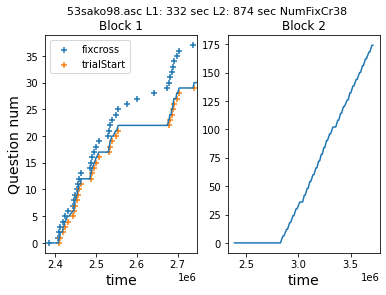

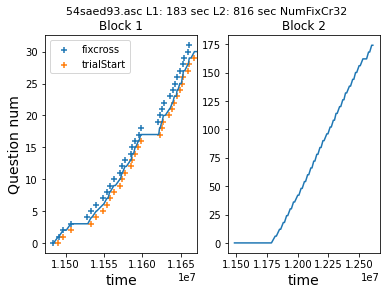

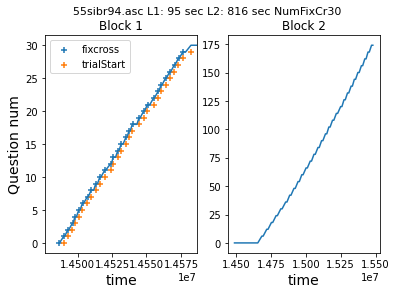

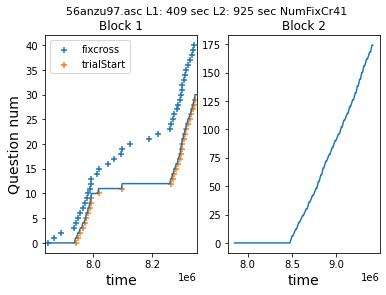

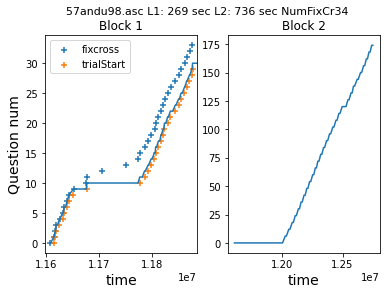

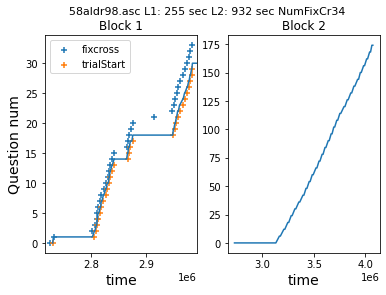

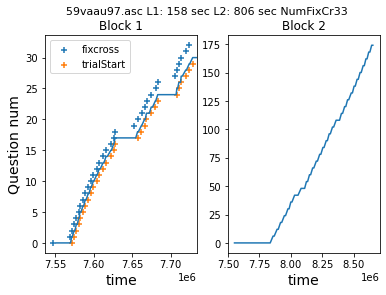

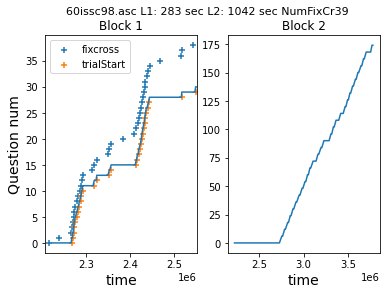

In [67]:
for cs,s in enumerate(Subjects[0:GoodS]):
    print(cs,s)
    Filename='ASCIIfiles/'+s
    Tab=pd.read_csv(Filename,skiprows=np.arange(1,79),sep='\t',error_bad_lines=False,names=['time', 'xpos', 'ypos', 'pupil', 'various', 'stuff'])  
    
    ## data cleaning
    TabSel=Tab[Tab['time'].apply(lambda x: str(x).isdigit())]  # remove non numeric from time
    TabSel.xpos=TabSel.xpos.str.replace(' ', '')  # remove spaces from x
    TabSel.ypos=TabSel.ypos.str.replace(' ', '')  # remove spaces from y
    TabSel.pupil=TabSel.pupil.str.replace(' ', '')  # remove spaces from pupil
    #TabSel=TabSel[TabSel['xpos']!='.']  # remove dots 
    TabSel.replace('.', np.nan, regex=False, inplace=True)   # replace dots with nans
    TabSel.time=pd.to_numeric(TabSel.time)
    TabSel.xpos=pd.to_numeric(TabSel.xpos)
    TabSel.ypos=pd.to_numeric(TabSel.ypos)
    TabSel.pupil=pd.to_numeric(TabSel.pupil)
    Times=np.float32(TabSel.time) #('int')
    xpos=np.float32(TabSel.xpos) #('int')
    ypos=np.float32(TabSel.ypos) 
    pupil=np.float32(TabSel.pupil)
  
    PupilAll[cs]=pupil
    TimesAll[cs]=Times

    print('Filtered size: ',np.shape(TabSel),'Row size: ',np.shape(Tab))
    CutPos1,CutPos2,StimulusB1,StimulusB2,PosTrialIndex,TrialIndexVar,QuestionTrialIndex,PosQuesTrial,FixCrossTimes,Resptimes,Disptimes=GetTrials(Tab)
    FixCrossTimesAll.append(FixCrossTimes)
    #print(len(CutPos1),len(CutPos2))
    #print(len(PosQuesTrial),len(PosTrialIndex))
    #print(QuestionTrialIndex)
    Time1=(PosQuesTrial[TrialIndexVar==30][0]-PosQuesTrial[TrialIndexVar==0][-1])/1000
    Time2=(PosQuesTrial[np.argmax(QuestionTrialIndex)]-PosQuesTrial[QuestionTrialIndex==0][-1])/1000
    LengthsBlock1[cs]=Time1
    LengthsBlock2[cs]=Time2
    
  #  RTdisp=np.array(Resptimes)-np.array(Disptimes)
    CountTr=0
    for crt,rt in enumerate(Resptimes):   # calculate response times
        if crt>0:
            if rt!=Resptimes[crt-1]:
                #print(crt,rt,Disptimes[crt])
                RespTimesAll[cs,CountTr]=rt-Disptimes[crt]
                CountTr+=1
    for ctr,tr in enumerate(Trials):  # first answer with 1 
        TrialStartsAll[cs,ctr]=PosTrialIndex[TrialIndexVar==tr][0]
    CountE=0
    for ctr,tr in enumerate(StimulusB1):
        if ctr>0:
            if tr!=StimulusB1[ctr-1]:
                #print(Count,StimulusB1[ctr-1],tr)
                TrialEndsAll[cs,CountE]=CutPos1[ctr]
                CountE+=1
#     for ctr,tr in enumerate(np.arange(NTr)):   # first trial starts with 0
#         TrialStartsAll[cs,ctr]=PosTrialIndex[TrialIndexVar==tr][-1]
    
    ## last trial of block one, based on start of second block stimulus info 
    TrialEndsAll[cs,-1]=CutPos1[np.nonzero(StimulusB2!=StimulusB2[0])[0][0]]
    
    print('Len block1: ',Time1,' sec')

    plt.figure()
    plt.subplot(1,2,1)
    plt.plot(PosTrialIndex,TrialIndexVar)#label='block1'
   
    plt.scatter(FixCrossTimes,np.arange(len(FixCrossTimes)),marker='+',label='fixcross')
    plt.scatter(TrialStartsAll[cs,:],np.arange(30),marker='+',label='trialStart')
#    plt.scatter(TrialStartsAll[cs,:],np.arange(30),marker='+',label='trialStart')

    
    plt.xlim([np.min(FixCrossTimes)-10000,np.max(FixCrossTimes)+10000])
    plt.ylabel('Question num',fontsize=14)
    plt.xlabel('time',fontsize=14)
    plt.legend()
    plt.title('Block 1')
    plt.subplot(1,2,2)
    plt.plot(PosQuesTrial,QuestionTrialIndex,label='block2')
    plt.xlabel('time',fontsize=14)
    plt.suptitle(s+' L1:'+' '+str(int(Time1))+' sec L2: '+str(int(Time2))+' sec NumFixCr'+str(len(FixCrossTimes)),fontsize=11)

    plt.title('Block 2')#  plt.legend()


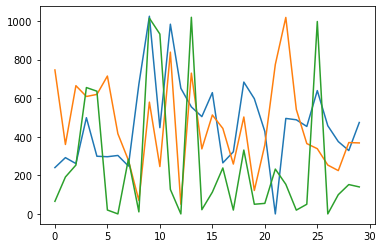

In [21]:
for b in range(3):
    plt.plot(RespTimesAll[b,:])

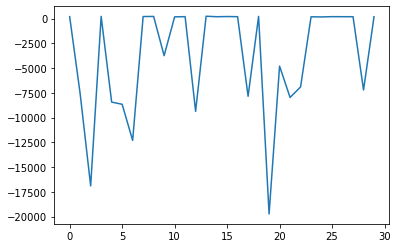

In [54]:
plt.plot(np.mean(RespTimesAll,0))

In [63]:
len(FixCrossTimesAll[2])

31

In [65]:
LengthsBlock1

array([249.898, 133.074, 158.125,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ])

In [16]:
da.sel(1.9, method="nearest")

ValueError: the first argument to .sel must be a dictionary

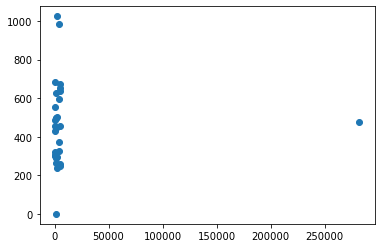

In [22]:
plt.scatter(TrialEndsAll[0,0:30]-TrialStartsAll[0,0:30],RespTimesAll[0,0:30])

(array([ 5.,  2., 10., 73.,  6.,  8.,  4.,  8.,  2.,  2.]),
 array([   0.       ,  101.7911103,  203.5822206,  305.3733309,
         407.1644412,  508.9555515,  610.7466618,  712.5377721,
         814.3288824,  916.1199927, 1017.911103 ]),
 <BarContainer object of 10 artists>)

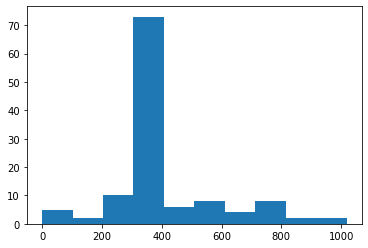

In [36]:
plt.hist(np.array(Resptimes)-np.array(Disptimes))

In [28]:
DataS=np.zeros(len(PupilAll))
for ci in range(GoodS): # (len(PupilAll)):
    DataS[ci]=len(PupilAll[ci])

#DataS
MaxL=int(np.max(DataS))

TypeError: object of type 'int' has no len()

In [29]:
PupilAll

array([array([1446., 1444., 1441., ..., 1483., 1483., 1483.], dtype=float32),
       array([948., 949., 949., ..., 817., 817., 818.], dtype=float32),
       array([1516., 1518., 1521., ..., 1657., 1657.,    0.], dtype=float32),
       array([1378., 1376., 1374., ..., 1217., 1217., 1216.], dtype=float32),
       array([1565., 1565., 1566., ..., 2127., 2126., 2126.], dtype=float32),
       array([1244., 1243., 1243., ..., 1183., 1183., 1183.], dtype=float32),
       array([1568., 1566., 1561., ..., 1649., 1649., 1648.], dtype=float32),
       array([1159., 1159., 1160., ..., 1678., 1678., 1679.], dtype=float32),
       array([1297., 1296., 1295., ..., 1221., 1227., 1225.], dtype=float32),
       array([1053., 1053., 1053., ..., 1194., 1194., 1194.], dtype=float32),
       array([1522., 1524., 1528., ..., 1944., 1946., 1946.], dtype=float32),
       array([1524., 1526., 1527., ..., 1459., 1457., 1455.], dtype=float32),
       array([2158., 2157., 2156., ..., 2211., 2211., 2211.], dtype=fl

In [23]:
CombinedTimes=np.zeros((GoodS,MaxL))
CombinedPupil=np.zeros((GoodS,MaxL))



NameError: name 'MaxL' is not defined

In [102]:
for ci in range(GoodS):
    PaddedPup=np.pad(PupilAll[ci],pad_width=(0,int(MaxL-DataS[ci])),mode='constant',constant_values=(np.nan,))
    PaddedTimes=np.pad(TimesAll[ci],pad_width=(0,int(MaxL-DataS[ci])),mode='constant',constant_values=(np.nan,))
    CombinedPupil[ci,:]=PaddedPup
    CombinedTimes[ci,]=PaddedTimes
        

In [44]:
np.float32(TabSel.time)

array([6094324., 6094325., 6094326., ..., 7324329., 7324330., 7324331.],
      dtype=float32)

In [549]:
np.shape(AllDatXR)

(2, 40, 747509)

In [103]:
AllDatXR=xr.DataArray(data=np.stack((CombinedTimes,CombinedPupil),0),coords=dict(measure=['time','pupil'],subjects=Subjects[0:GoodS],time=np.arange(MaxL)))

In [541]:
AllDatXR

<xarray.DataArray (measure: 2, subjects: 40, time: 747509)>
array([[[3.047720e+06, 3.047721e+06, 3.047722e+06, ...,          nan,
                  nan,          nan],
        [6.094324e+06, 6.094325e+06, 6.094326e+06, ...,          nan,
                  nan,          nan],
        [2.292991e+06, 2.292992e+06, 2.292993e+06, ...,          nan,
                  nan,          nan],
        ...,
        [2.724958e+06, 2.724959e+06, 2.724960e+06, ...,          nan,
                  nan,          nan],
        [7.546659e+06, 7.546660e+06, 7.546661e+06, ...,          nan,
                  nan,          nan],
        [2.215380e+06, 2.215381e+06, 2.215382e+06, ...,          nan,
                  nan,          nan]],

       [[1.446000e+03, 1.444000e+03, 1.441000e+03, ...,          nan,
                  nan,          nan],
        [9.480000e+02, 9.490000e+02, 9.490000e+02, ...,          nan,
                  nan,          nan],
        [1.516000e+03, 1.518000e+03, 1.521000e+03, ...,          nan,
                  nan,          nan],
        ...,
        [1.348000e+03, 1.347000e+03, 1.347000e+03, ...,          nan,
                  nan,          nan],
        [1.010000e+03, 1.011000e+03, 1.012000e+03, ...,          nan,
                  nan,          nan],
        [1.493000e+03, 1.493000e+03, 1.495000e+03, ...,          nan,
                  nan,          nan]]])
Coordinates:
  * measure   (measure) <U5 'time' 'pupil'
  * subjects  (subjects) <U12 '10irsa98.asc' '11dasc94.asc' ... '60issc98.asc'
  * time      (time) int32 0 1 2 3 4 5 ... 747504 747505 747506 747507 747508

In [548]:
#AllDatXR.to_netcdf("AllPupilData.nc")

In [70]:
AllDatXR[0,1,0:100]


<xarray.DataArray (time: 100)>
array([3047720., 3047721., 3047722., 3047723., 3047724., 3047725.,
       3047726., 3047727., 3047728., 3047729., 3047730., 3047731.,
       3047732., 3047733., 3047734., 3047735., 3047736., 3047737.,
       3047738., 3047739., 3047740., 3047741., 3047742., 3047743.,
       3047744., 3047745., 3047746., 3047747., 3047748., 3047749.,
       3047750., 3047751., 3047752., 3047753., 3047754., 3047755.,
       3047756., 3047757., 3047758., 3047759., 3047760., 3047761.,
       3047762., 3047763., 3047764., 3047765., 3047766., 3047767.,
       3047768., 3047769., 3047770., 3047771., 3047772., 3047773.,
       3047774., 3047775., 3047776., 3047777., 3047778., 3047779.,
       3047780., 3047781., 3047782., 3047783., 3047784., 3047785.,
       3047786., 3047787., 3047788., 3047789., 3047790., 3047791.,
       3047792., 3047793., 3047794., 3047795., 3047796., 3047797.,
       3047798., 3047799., 3047800., 3047801., 3047802., 3047803.,
       3047804., 3047805., 3047806., 3047807., 3047808., 3047809.,
       3047810., 3047811., 3047812., 3047813., 3047814., 3047815.,
       3047816., 3047817., 3047818., 3047819.])
Coordinates:
    measure   <U5 'time'
    subjects  <U12 '10irsa98.asc'
  * time      (time) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99

In [104]:
GoodS=40

In [105]:
TrialStartsAll

array([[7081023., 7089416., 7091273., ..., 7457682., 7467712., 7469922.],
       [3052413., 3059406., 3062661., ..., 3284857., 3291449., 3298635.],
       [6095934., 6099518., 6105095., ..., 6219742., 6224575., 6227978.],
       ...,
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.]])

In [369]:
np.sum(np.isfinite(TabSel.xpos))

469301

In [370]:

np.sum(np.isfinite(TabSel.time))

472593

In [371]:
np.sum(np.isnan(TabSel.time))

0

(array([3.29400e+03, 6.00000e+01, 1.73000e+02, 5.89000e+02, 4.25700e+03,
        6.56340e+04, 1.97062e+05, 1.63497e+05, 3.25250e+04, 5.50200e+03]),
 array([   0.,  231.,  462.,  693.,  924., 1155., 1386., 1617., 1848.,
        2079., 2310.]),
 <BarContainer object of 10 artists>)

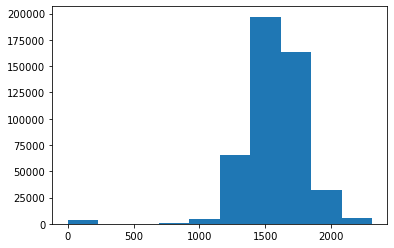

In [388]:
plt.hist(TabSel.pupil)

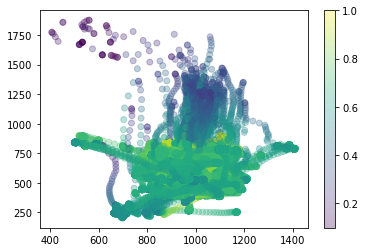

In [392]:
plt.scatter(TabSel.xpos,TabSel.ypos,c=TabSel.pupil/np.max(TabSel.pupil),alpha=.3)


In [ ]:
plt.scatter(TabSel.xpos,TabSel.ypos)

## pupil filtering

In [61]:

def PupFiltZero(PupilArray,wins=5):
    PupilFilt=np.copy(PupilArray)
    Idx=np.nonzero(PupilArray==0)[0]
    L=len(PupilArray)
    for w in range(wins):
        if np.max(Idx)+wins<L:
            PupilFilt[Idx+w]=np.NAN
            PupilFilt[Idx-w]=np.NAN
        else:
            PupilFilt[Idx[:-1]+w]=np.NAN
            PupilFilt[Idx-w]=np.NAN
            
    return PupilFilt,np.sum(np.isfinite(PupilFilt)==False)/L

In [55]:

def PupFiltMinVal(PupilArray,minV=600):
    PupilFilt=np.copy(PupilArray)
    Idx=np.nonzero(PupilArray<minV)[0]
    PupilFilt[Idx]=np.NAN
    return PupilFilt,len(Idx)/len(PupilFilt)

In [107]:

def PupFiltZ(PupilArray,diffthr=3,wins=10):
    PupilFilt=np.copy(PupilArray)
    PupilFilt=np.float32(PupilFilt)
    # filter based on zscore
    Zscore=(PupilArray-np.nanmean(PupilArray))/np.nanstd(PupilArray)
   # PupilFilt[Zscore<-diffthr]=np.NAN
    Idx=np.nonzero(np.abs(Zscore)>diffthr)[0]
   # PupilFilt[Idx]=np.NAN
    for j in range(wins):
        if np.min(Idx)-j>=0:
            PupilFilt[Idx-j]=np.NAN
        else:
            PupilFilt[Idx[1:]-j]=np.NAN     
        if (np.max(Idx)+j)<len(PupilFilt):
            PupilFilt[Idx+j]=np.NAN
        else:
            PupilFilt[Idx[:-1]+j]=np.NAN
    return PupilFilt, np.sum(np.isfinite(PupilFilt)==False)/len(PupilArray)


In [58]:
def PupFiltDiff(PupilArray,diffthr=99.5,wins=10):
    PupilFilt=np.copy(PupilArray)
    PupilFilt=np.float32(PupilFilt)
    Perc=np.nanpercentile(np.diff(PupilArray),diffthr)    
    # filter based on diff
    Idx=np.nonzero(np.diff(PupilArray)>Perc)[0]   
    for j in range(wins):
        if np.min(Idx)-j>0:
            PupilFilt[Idx-j]=np.NAN
        else:
            PupilFilt[Idx[1:]-j]=np.NAN
            
        if (np.max(Idx)+j)<len(PupilFilt):
            PupilFilt[Idx+j]=np.NAN
        else:
            #print(len(PupilFilt),np.max(Idx))
            try: 
                PupilFilt[Idx[0:-1]+j]=np.NAN
            except:
                PupilFilt[Idx[0:-wins]+j]=np.NAN
                
    return PupilFilt, np.sum(np.isfinite(PupilFilt)==False)/len(PupilArray)


In [133]:
FixCrossTimes

array([2724993, 2730721, 2800904, 2805729, 2809415, 2810963, 2812108,
       2816513, 2818153, 2822147, 2826290, 2829351, 2832271, 2834406,
       2837845, 2841598, 2864149, 2866218, 2867970, 2871390, 2875843,
       2914424, 2948007, 2949993, 2952755, 2955526, 2957819, 2961193,
       2967197, 2970319, 2974959, 2977968, 2980436, 2983141])

In [132]:
TrialStartsAll

array([[7081023., 7089416., 7091273., ..., 7457682., 7467712., 7469922.],
       [3052413., 3059406., 3062661., ..., 3284857., 3291449., 3298635.],
       [6095934., 6099518., 6105095., ..., 6219742., 6224575., 6227978.],
       ...,
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.],
       [      0.,       0.,       0., ...,       0.,       0.,       0.]])

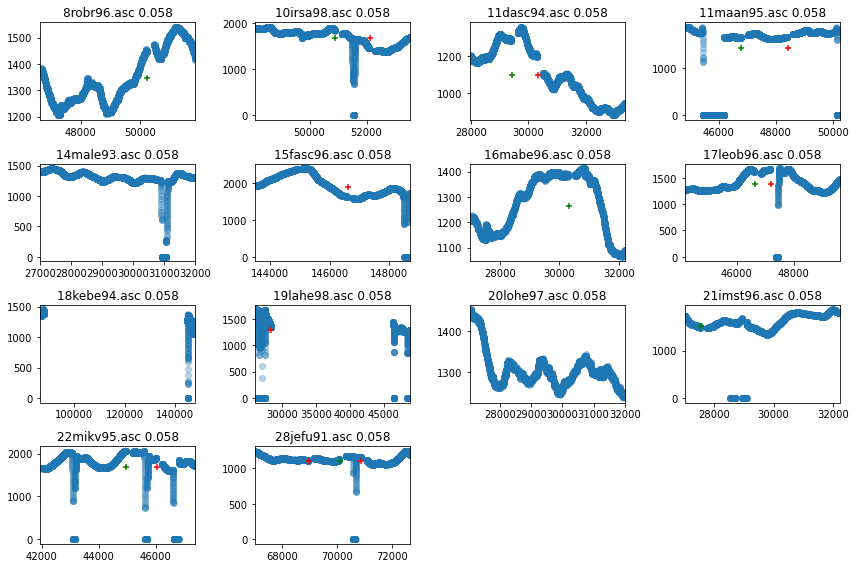

In [131]:
plt.figure(figsize=(12,8))
Start=25000
WinS=5000


FixCrossTimes
for cs,s in enumerate(Subjects[0:14]):
    #filt1,rat=PupFiltZ(PupilAll[cs],diffthr=3.2,wins=10)
    #filt2,rat=PupFiltZero(PupilAll[cs],wins=25)
    #filt2,rat=PupFiltDiff(filt1,diffthr=99,wins=10)

    plt.subplot(4,4,cs+1)
    StartT=TimesAll[cs][0]

    XDat=TimesAll[cs][Start:Start+WinS]-StartT
    YDat=PupilAll[cs][Start:Start+WinS]#-StartT
    plt.scatter(XDat,YDat,alpha=.3)  #-TimesAll[cs][0]  
    
    plt.scatter(TrialStartsAll[cs,:]-StartT,np.ones(30)*np.mean(YDat),marker='+',color='g')
    
    plt.scatter(TrialEndsAll[cs,:]-StartT,np.ones(30)*np.mean(YDat),marker='+',color='r')
#plt.plot(filt2[Start:Start+WinS])
    plt.title(s+' '+str(np.round(rat,3)))
    
    plt.xlim([np.nanmin(XDat),np.nanmax(XDat)])
plt.tight_layout()

In [272]:
np.sum(np.isfinite(PupilAll[cs])==False)

0

In [406]:
PupilAll[cs]

0

### visualize filtering

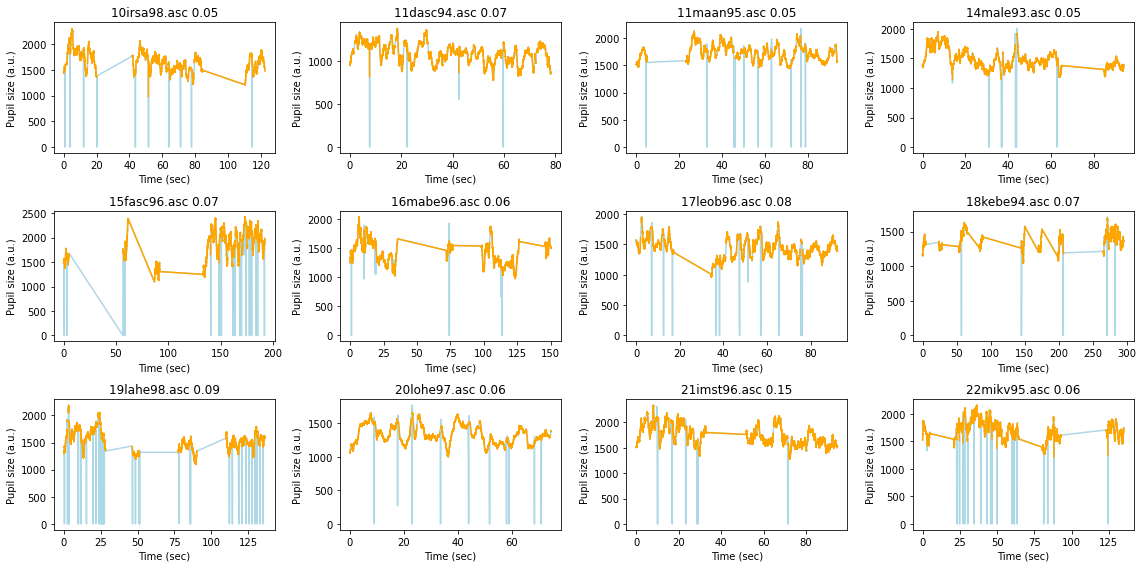

In [64]:
WinS=70000

plt.figure(figsize=(16,8))
for cs,s in enumerate(Subjects[0:12]):
    StartT=TimesAll[cs][0]
    plt.subplot(3,4,cs+1)
    filt,rat=PupFiltZero(PupilAll[cs],25)

    #filt,rat=PupFiltMinVal(filt)
    filt,rat=PupFiltDiff(filt,diffthr=99.5,wins=20)

    plt.plot((TimesAll[cs][0:WinS]-StartT)/1000,PupilAll[cs][0:WinS],color='lightblue')
    plt.plot((TimesAll[cs][0:WinS]-StartT)/1000,filt[0:WinS],color='orange')
    plt.title(s+' '+str(np.round(rat,2)))
    plt.xlabel('Time (sec)')
    plt.ylabel('Pupil size (a.u.)')
plt.tight_layout()

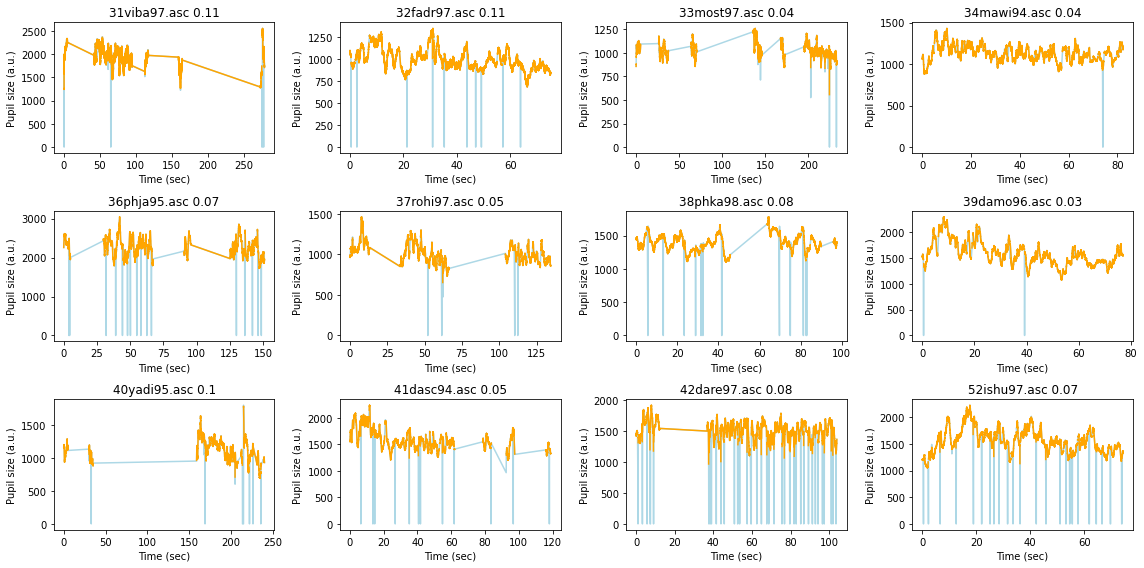

In [574]:
StartS=20
plt.figure(figsize=(16,8))
for cs,s in enumerate(Subjects[StartS:StartS+12]):
    StartT=TimesAll[StartS+cs][0]
    plt.subplot(3,4,cs+1)
    filt,rat=PupFiltZero(PupilAll[StartS+cs],25)
    filt,rat=PupFiltDiff(filt,diffthr=99.5,wins=20)
   
    plt.plot((TimesAll[StartS+cs][0:WinS]-StartT)/1000,PupilAll[StartS+cs][0:WinS],color='lightblue')
    plt.plot((TimesAll[StartS+cs][0:WinS]-StartT)/1000,filt[0:WinS],color='orange')
    plt.title(s+' '+str(np.round(rat,2)))
    plt.xlabel('Time (sec)')
    plt.ylabel('Pupil size (a.u.)')
plt.tight_layout()

# Trial times

Text(0, 0.5, 'Num Participants')

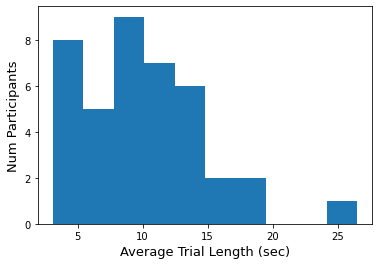

In [65]:
plt.hist(np.nanmean((TrialEndsAll-TrialStartsAll)[0:GoodS,:]/1000,1))
plt.xlabel('Average Trial Length (sec)',fontsize=13)
plt.ylabel('Num Participants',fontsize=13)

## store filtered data in xarray

In [71]:
for cs,s in enumerate(Subjects[0:GoodS]):
    filt,rat=PupFiltZero(PupilAll[cs],25)
    filt,rat=PupFiltDiff(filt,diffthr=99.5,wins=20)
    AllDatXR[1,cs,0:int(DataS[cs])]=filt

## pupil trial division

In [67]:
PupilTrialB1=np.zeros((GoodS,NTr-1),dtype=object)                       
PupilBaselineB1=np.zeros((GoodS,NTr-1),dtype=object)  
for cs in range(GoodS):
    filt,rat=PupFiltZero(PupilAll[cs],80)
    filt,rat=PupFiltDiff(filt,diffthr=99.5,wins=20)
    for ctr in np.arange(NTr-1):
       # Idx=(AllDatXR[0,cs,:]>TrialStartsAll[cs,ctr]) & (AllDatXR[0,cs,:]<TrialEndsAll[cs,ctr]).to_numpy()
    
        Idx=(TimesAll[cs]>TrialStartsAll[cs,ctr]) & (TimesAll[cs]<TrialEndsAll[cs,ctr]) #.to_numpy()

        PupilTrialB1[cs,ctr]=filt[Idx] #.to_numpy()
        #IdxBL=(AllDatXR[0,cs,:]<TrialStartsAll[cs,ctr]).to_numpy()
        IdxBL=np.nonzero(TimesAll[cs]<TrialStartsAll[cs,ctr])[0][-1] #.to_numpy()
        PupilBaselineB1[cs,ctr]=filt[IdxBL-220:IdxBL] #.to_numpy()
    

In [80]:
NTr

30

In [623]:
IdxBL

<xarray.DataArray (time: 747509)>
array([ True,  True,  True, ..., False, False, False])
Coordinates:
    measure   <U5 'time'
    subjects  <U12 '10irsa98.asc'
  * time      (time) int32 0 1 2 3 4 5 ... 747504 747505 747506 747507 747508

In [616]:
np.nonzero(Times<TrialStartsAll[cs,ctr])

(array([], dtype=int64),)

In [618]:
ctr

0

In [613]:
AllDatXR[1,cs,Idx].to_numpy()

array([1932., 1932., 1932., ...,   nan,   nan,   nan])

## Visualize trials from start

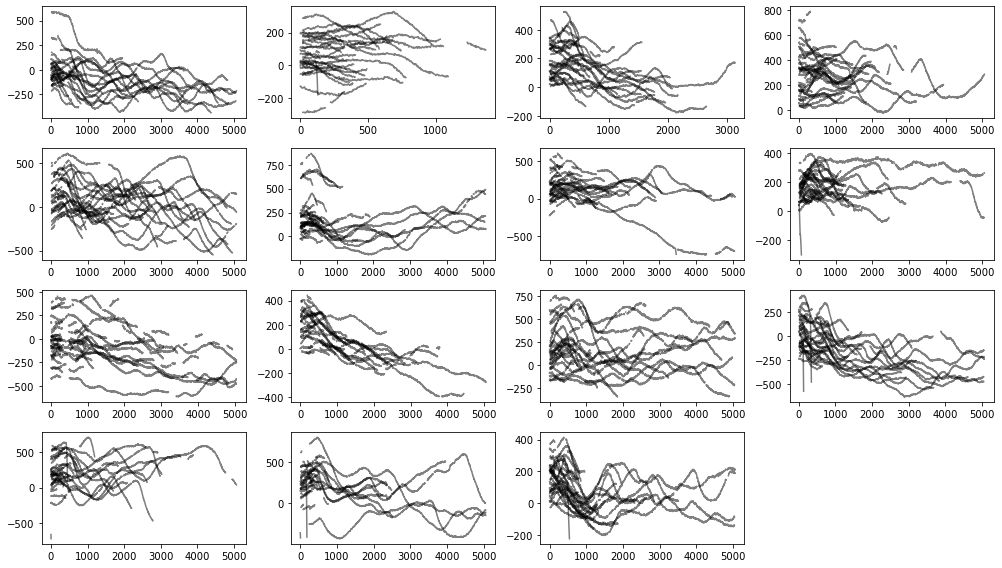

In [68]:

plt.figure(figsize=(14,8))
for cs in range(15):
    plt.subplot(4,4,cs+1)
    for cr in range(29):
        #plt.plot(PupilTrialB1[cs,cr],color='k',alpha=.5)

        plt.plot(PupilTrialB1[cs,cr]-np.nanmedian(PupilBaselineB1[cs,ctr]),color='k',alpha=.5)
plt.tight_layout()

## visulize trials from end

C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


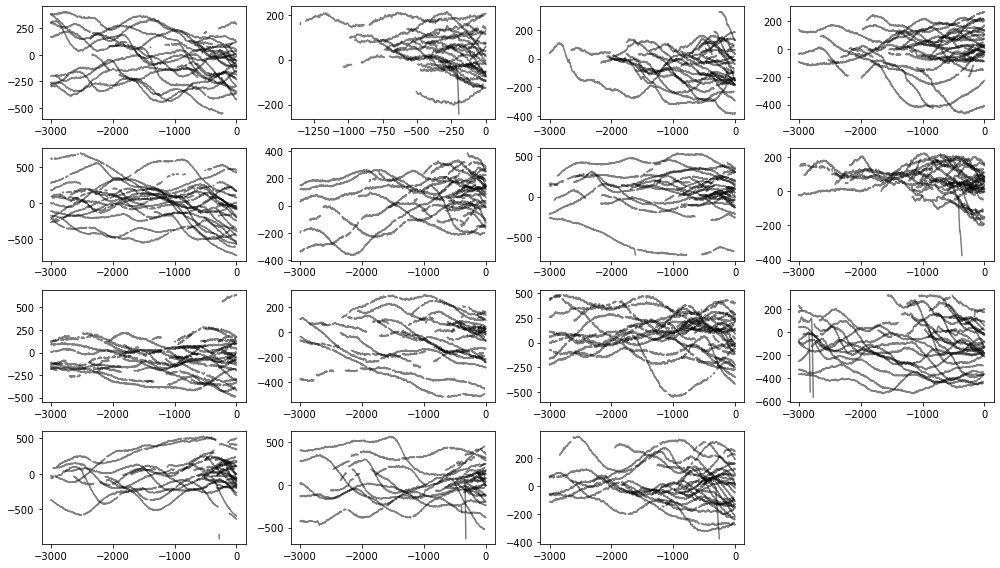

In [69]:
plt.figure(figsize=(14,8))
for cs in range(15):
    plt.subplot(4,4,cs+1)
    for cr in range(30-1):
        L=len(PupilTrialB1[cs,cr])
        if L<3000:
           # print(L)
            plt.plot(np.arange(-L,0),PupilTrialB1[cs,cr][-3000:]-np.nanmean(PupilBaselineB1[cs,cr]),color='k',alpha=.5)
        else:
            plt.plot(np.arange(-3000,0),PupilTrialB1[cs,cr][-3000:]-np.nanmean(PupilBaselineB1[cs,cr]),color='k',alpha=.5)

            
plt.tight_layout()

In [679]:
len(PupilTrialB1[cs,cr][-3000:])

1385

In [70]:
MaxIdx=np.zeros((GoodS,NTr-1))
MaxIdxP=np.zeros((GoodS,NTr-1))

for cs in range(GoodS):
    filt,rat=PupFiltZero(PupilAll[cs],80)
    for ctr in np.arange(NTr-1):
        L=len(PupilTrialB1[cs,ctr])
        MaxIdx[cs,ctr]=np.argmax(PupilTrialB1[cs,ctr])
        MaxIdxP[cs,ctr]=MaxIdx[cs,ctr]/L
       

In [73]:
from scipy import stats

ImportError: DLL load failed: The specified module could not be found.

<ErrorbarContainer object of 3 artists>

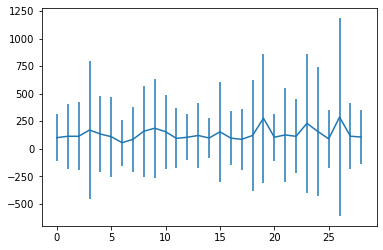

In [76]:
plt.errorbar(np.arange(NTr-1),np.mean(MaxIdx,0),np.std(MaxIdx,0))
#plt.colorbar()

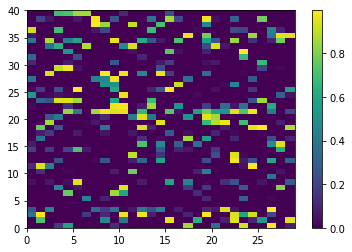

In [77]:
plt.pcolor(MaxIdxP)
plt.colorbar()

Text(0.5, 0, 'Max Position')

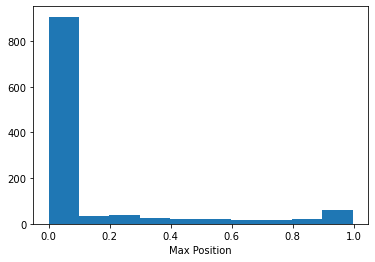

In [78]:
plt.hist(MaxIdxP.flatten())
plt.xlabel('Max Position')

### check size of original and filtered data

In [241]:
print(np.shape(TabSel),np.shape(Tab))

(469301, 6) (484632, 6)


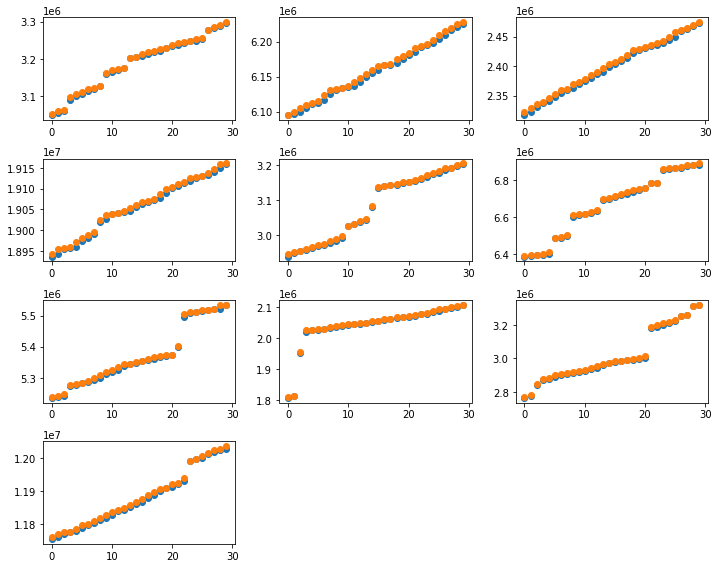

In [695]:
plt.figure(figsize=(10,8))
for s in range(10):
    plt.subplot(4,3,s+1)
    plt.scatter(np.arange(30),TrialStartsAll[s,:])
    plt.scatter(np.arange(30),TrialEndsAll[s,:])
plt.tight_layout()

In [103]:
LengthsBlock1

array([393.862, 249.898, 133.074, 158.125, 224.218, 267.414, 506.469,
       299.704, 300.562, 557.959, 284.152, 237.324, 355.817,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ])

In [80]:
Trials=np.arange(1,31)

#TrialIndexVar


print(TrialEnds-TrialStarts)

[6095934. 6099518. 6105095. 6109977. 6111873. 6115120. 6123747. 6130466.
 6132442. 6134203. 6136321. 6142219. 6148621. 6153772. 6158882. 6165331.
 6166795. 6168746. 6175029. 6180020. 6184493. 6191549. 6194478. 6197021.
 6202550. 6209029. 6215533. 6219742. 6224575. 6227978.]
[1031. 2762. 5158. 4038.  894. 2042. 7010. 5808. 1404.  856. 1581. 5326.
 5594. 4158. 3777. 6043.  724. 1589. 4989. 4614. 3789. 6321. 2346. 1879.
 4843. 5877. 5797. 3665. 3807. 2753.]


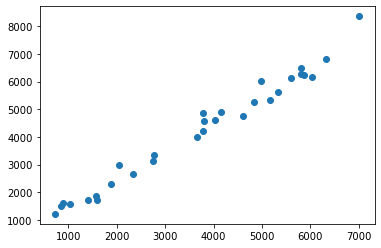

In [81]:
plt.scatter(TrialEnds-TrialStarts,TrialEnds-FixCrossTimes)



In [82]:
TrialStarts-FixCrossTimes

array([ 544.,  579.,  168.,  570.,  731.,  958., 1353.,  668.,  324.,
        650.,  291.,  313.,  542.,  743., 1080.,  127.,  494.,  126.,
       1044.,  128.,  412.,  480.,  329.,  412.,  433.,  348.,  463.,
        334.,  766.,  393.])

In [242]:
CutPos1,CutPos2,StimulusB1,StimulusB2,PosTrialIndex,TrialIndexVar,QuestionTrialIndex,PosQuesTrial=GetTrials(DataTab)

dtype('int64')

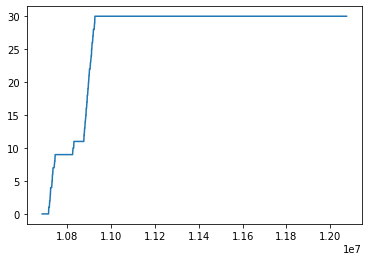

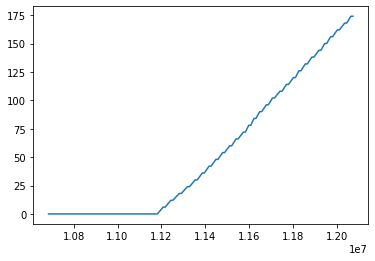

In [322]:
#plt.scatter(np.diff(CutPos1),np.diff(CutPos2))

#plt.plot(np.diff(PosQuesTrial))
plt.plot(PosTrialIndex,TrialIndexVar)
plt.figure()
plt.plot(PosQuesTrial,QuestionTrialIndex)

idea for cutting trials
Cut first of Question trial index

In [327]:
#np.diff(PosTrialIndex)



QuestionTrialIndex[TrialIndexVar==30]
np.diff(PosQuesTrial[TrialIndexVar==30])

array([247023,   9249,  26002,   9248,  25966,   9251,  29297,   9254,
        27914,   9252,  26621,   9262,  22458,   9270,  21599,   9263,
        22242,   9251,  21090,   9257,  23062,   9281,  19846,   9266,
        23856,   9254,  15556,   9250,  14335,   9273,  16729,   9259,
        21266,   9259,  18570,   9257,  25218,   9263,  20330,   9263,
        22308,   9253,  15879,   9261,  19834,   9267,  20679,   9257,
        22813,   9264,  17203,   9257,  17879,   9283,  21308,   9266,
        24516,   9263,  18880,   9261])

In [338]:
(247023/1000)/60

4.11705

211.493

In [347]:
210/30

7.0

In [336]:
np.diff(PosQuesTrial)

array([ 29118,    961,   2512,   1911,   1034,   1816,    376,    943,
         4675,   1893,    620,   1188,   1005,   1572,   4810,   2893,
          611,   1391,   5263,  74089,   2012,   3115,   1135,   5293,
        39756,   1089,    650,   2015,    793,   1822,    460,   2685,
          618,    885,   1260,   2069,    629,    826,   1469,   1843,
          623,   1802,    492,   1660,    640,   1680,   2720,   1665,
          731,   2780,    925,    819,    673,   1791,   1618,   1904,
          637,   1713,   3257,   1848,    676,    852, 247023,   9249,
        26002,   9248,  25966,   9251,  29297,   9254,  27914,   9252,
        26621,   9262,  22458,   9270,  21599,   9263,  22242,   9251,
        21090,   9257,  23062,   9281,  19846,   9266,  23856,   9254,
        15556,   9250,  14335,   9273,  16729,   9259,  21266,   9259,
        18570,   9257,  25218,   9263,  20330,   9263,  22308,   9253,
        15879,   9261,  19834,   9267,  20679,   9257,  22813,   9264,
      

In [331]:
#np.diff(PosQuesTrial[TrialIndexVar==29])
np.diff(PosQuesTrial[(QuestionTrialIndex>35)&(QuestionTrialIndex<43)])

array([ 9270, 21599,  9263])

In [288]:
# for cx,x in enumerate(xx):
#   #  if cx<5000:
       
#     if x.find('pic_screen')!=-1:
#         if x.find('rating_pic_screen')!=-1:
#             StimulusB2.append(x[x.find('screen')+7:])
#             CutPos2.append(int(x[0:x.find(' ')]))
#         if x.find(' pic_screen')!=-1:
#             CutPos1.append(int(x[0:x.find(' ')]))
#             StimulusB1.append(x[x.find('screen')+7:])
#     if x.find('trial_index_')!=-1:
#         #print(cx,x)
#         if x.find('question_trial_index')!=-1:
#             PosQuesTrial.append(int(x[0:x.find(' ')]))
#             QuestionTrialIndex.append(int(x[x.find('trial_index_')+21:]))    
#         else:
#             PosTrialIndex.append(int(x[0:x.find(' ')]))
#             TrialIndexVar.append(int(x[x.find('trial_index_')+21:]))
#       # 
        
# CutPos1=np.array(CutPos1)
# CutPos2=np.array(CutPos2)

# StimulusB1=np.array(StimulusB1)
# StimulusB2=np.array(StimulusB2)

# PosTrialIndex=np.array(PosTrialIndex)
# TrialIndexVar=np.array(TrialIndexVar)
# QuestionTrialIndex=np.array(QuestionTrialIndex)
# PosQuesTrial=np.array(PosQuesTrial)
        

In [694]:
# for cx,x in enumerate(xx):
#     #if x.find('pic_screen')!=-1:
#     #    print(x)
#     if x.find('TRIAL_VAR')!=-1:
#         print(x)

In [183]:
PosTrialIndex

array([14183161, 14214871, 14225619, 14226189, 14236948, 14237568,
       14248323, 14251056, 14254447, 14255415, 14266173, 14267280,
       14274279, 14274874, 14285623, 14286181, 14296952, 14298053,
       14306640, 14307678, 14315010, 14315533, 14323522, 14325584,
       14331338, 14332446, 14333835, 14334869, 14340644, 14341787,
       14352533, 14352973, 14363746, 14364566, 14372337, 14376823,
       14377900, 14378984, 14379804, 14380868, 14386054, 14387170,
       14388743, 14390255, 14394996, 14395594, 14396485, 14396866,
       14398327, 14403610, 14425512, 14444165, 14446962, 14450813,
       14451746, 14452602, 14453346, 14456231, 14459153, 14461100,
       14464777, 14469205, 14472402, 14554727, 14563972, 14604595,
       14613874, 14640975, 14650234, 14681798, 14691057, 14714748,
       14724003, 14749655, 14758935, 14782967, 14792212, 14819561,
       14828815, 14859861, 14869115, 14894255, 14903532, 14924686,
       14933941, 14952308, 14961567, 14985282, 15006180, 15015

In [184]:
TrialIndexVar

array([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,
        8,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16,
       17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 24,
       24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30])

In [185]:
QuestionTrialIndexyes

array([], dtype=float64)

3449
1973
4571
1333
1385
5006
1012
7880
925
5628
353
4573
2061
4580
139
2361
4523
745
5070
1289


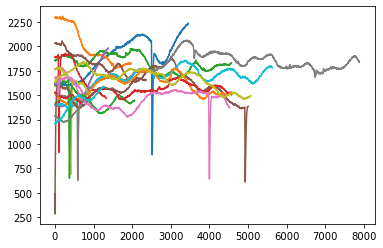

In [246]:
TabSel['time']

for i in range(20):
    print(np.sum((TabSel['time']>PosTrialIndex[i]) &(TabSel['time']<PosTrialIndex[i+1])))
    L=np.sum((TabSel['time']>PosTrialIndex[i]) &(TabSel['time']<PosTrialIndex[i+1]))
    plt.plot(np.arange(L),TabSel['pupil'][(TabSel['time']>PosTrialIndex[i]) &(TabSel['time']<PosTrialIndex[i+1])])

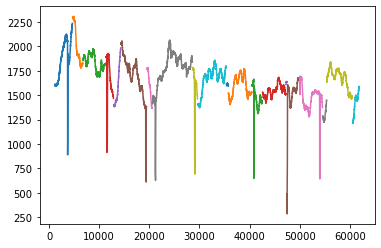

In [247]:
for i in range(20):
    plt.plot(TabSel['pupil'][(TabSel['time']>PosTrialIndex[i]) &(TabSel['time']<PosTrialIndex[i+1])])

In [29]:
TabSel['pupil'] TrialIdx

NameError: name 'TrialIdx' is not defined

In [42]:
np.diff(PosQuesTrial)

array([  3676,   2212,   4781,   1658,   1597,   5305,  22529,   8134,
         1201,   5843,    597,   4785,   2321,   4793,    400,   2633,
         4797,    946,   5313,  27166,   2354,   2572,   4926,   1057,
         1262,   3914,    924,   5302,  20840,    838,    803,    782,
         2580,   4067,   1019,   5806,    918,   1658,    373,   6228,
          549,    899,   4610,   3862,    668,   4494,   1011,   1834,
          933,   1813,    603,   3884,    808,    929,   5295,  16429,
         1781,   5108,   1699,   3880,   2713,   4320,   2866, 282093,
        18305,   9277,  47342,   9276,  35864,   9256,  33023,   9249,
        31771,   9251,  39941,   9274,  36824,   9262,  29629,   9255,
        28975,   9260,  26166,   9268,  31275,   9258,  23530,   9251,
        38881,  18148,   9264,  61783,   9264,  27934,   9268,  31513,
         9255,  35742,   9250,  38213,   9261,  29598,   9273,  39055,
         9254,  39371,   9255,  34267,   9258,  30708,   9280,  21111,
      

In [43]:
np.diff(PosTrialIndex)

array([  3676,   2212,   4781,   1658,   1597,   5305,  22529,   8134,
         1201,   5843,    597,   4785,   2321,   4793,    400,   2633,
         4797,    946,   5313,  27166,   2354,   2572,   4926,   1057,
         1262,   3914,    924,   5302,  20840,    838,    803,    782,
         2581,   4066,   1019,   5806,    918,   1658,    373,   6228,
          549,    899,   4610,   3862,    667,   4495,   1011,   1834,
          933,   1813,    603,   3885,    807,    929,   5295,  16429,
         1781,   5109,   1699,   3879,   2713,   4320,   2866, 282093,
        18305,   9277,  47342,   9276,  35864,   9256,  33023,   9249,
        31771,   9251,  39941,   9274,  36824,   9262,  29629,   9255,
        28975,   9260,  26166,   9268,  31275,   9258,  23530,   9251,
        38881,  18148,   9264,  61783,   9264,  27934,   9268,  31513,
         9255,  35742,   9250,  38213,   9261,  29598,   9273,  39055,
         9254,  39371,   9255,  34267,   9258,  30708,   9279,  21112,
      

In [16]:
len(StimulusB1)
len(StimulusB2)

127

In [44]:
StimulusB1

array(['KUBIS_LSC21c.jpg', 'KUBIS_LSC21c.jpg', 'KUBIS_LSC18c.jpg',
       'KUBIS_LSC18c.jpg', 'KUBIS_FIG27c.jpg', 'KUBIS_FIG27c.jpg',
       'KUBIS_FIG6c.jpg', 'KUBIS_FIG6c.jpg', 'KUBIS_FIG6c.jpg',
       'KUBIS_FIG13c.jpg', 'KUBIS_FIG13c.jpg', 'KUBIS_LSC2c.jpg',
       'KUBIS_LSC2c.jpg', 'KUBIS_FIG22c.jpg', 'KUBIS_FIG22c.jpg',
       'KUBIS_LSC24c.jpg', 'KUBIS_LSC24c.jpg', 'KUBIS_FIG14c.jpg',
       'KUBIS_FIG14c.jpg', 'KUBIS_LSC25c.jpg', 'KUBIS_LSC25c.jpg',
       'KUBIS_LSC25c.jpg', 'KUBIS_LSC26c.jpg', 'KUBIS_LSC26c.jpg',
       'KUBIS_LSC1c.jpg', 'KUBIS_LSC1c.jpg', 'KUBIS_FIG15c.jpg',
       'KUBIS_FIG15c.jpg', 'KUBIS_FIG21c.jpg', 'KUBIS_FIG21c.jpg',
       'KUBIS_FIG21c.jpg', 'KUBIS_FIG20c.jpg', 'KUBIS_FIG20c.jpg',
       'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg', 'KUBIS_LSC3c.jpg',
       'KUBIS_LSC3c.jpg', 'KUBIS_LSC27c.jpg', 'KUBIS_LSC27c.jpg',
       'KUBIS_FIG18c.jpg', 'KUBIS_FIG18c.jpg', 'KUBIS_FIG29c.jpg',
       'KUBIS_FIG29c.jpg', 'KUBIS_LSC7c.jpg', 'KUBIS_LSC7c.jpg',
      

In [45]:
StimulusB2

array(['KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg',
       'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg',
       'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg',
       'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg',
       'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg',
       'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg',
       'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg',
       'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg',
       'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg',
       'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg',
       'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg',
       'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg',
       'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg',
       'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg',
       'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.jpg', 'KUBIS_FIG16c.j

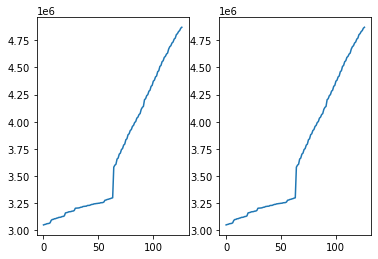

In [249]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(CutPos1)
plt.subplot(1,2,2)
plt.plot(CutPos2)

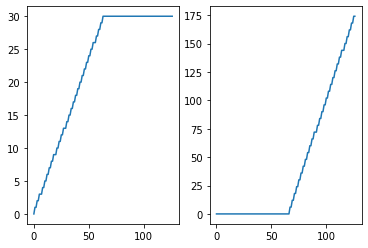

In [248]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(TrialIndexVar)
plt.subplot(1,2,2)
plt.plot(QuestionTrialIndex)

In [143]:
QuestionTrialIndex

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   6,   6,  12,  12,  18,  18,  24,  24,  30,  30,
        36,  36,  42,  42,  48,  48,  54,  54,  60,  60,  66,  66,  72,
        72,  78,  78,  84,  84,  90,  90,  96,  96, 102, 102, 108, 108,
       114, 114, 120, 120, 126, 126, 132, 132, 138, 138, 144, 144, 150,
       150, 156, 156, 162, 162, 168, 168, 174, 174])

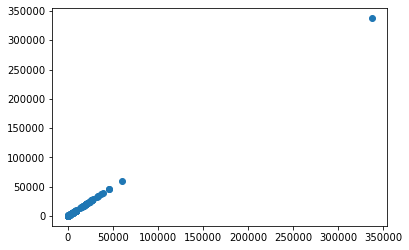

In [123]:
#plt.scatter(np.diff(CutPos),np.diff(PosTrialIndex))

In [43]:
xx=Tab['xpos'][Tab['time']=='MSG']
FixCrossTimes=[]
for cx,x in enumerate(xx):
    #        CutPos2.append(int(x[0:x.find(' ')]))          
    if x.find('fix cross')!=-1 and x.find('screen')==-1:
        print(cx,x)
        FirstSpace=x.find(' ')
        FixCrossTimes.append(int(x[:FirstSpace]))
        #FixCross.append()
            


57 9354958 -12 fix cross
145 9359777 -14 fix cross
233 9364406 -6 fix cross
321 9371258 -10 fix cross
407 9373751 -3 fix cross
495 9382724 -4 fix cross
568 9406697 -3 fix cross
656 9412051 -4 fix cross
743 9416060 -15 fix cross
830 9419681 -14 fix cross
917 9425471 -12 fix cross
1003 9428572 -14 fix cross
1091 9435428 -14 fix cross
1179 9443276 -7 fix cross
1266 9446937 -16 fix cross
1357 9459166 -14 fix cross
1446 9464690 -12 fix cross
1534 9469897 -9 fix cross
1619 9472252 -7 fix cross
1705 9474524 -4 fix cross
1778 9496483 -15 fix cross
1867 9502849 -4 fix cross
1955 9507816 -8 fix cross
2044 9513784 -12 fix cross
2131 9517859 -7 fix cross
2217 9522008 -12 fix cross
2304 9526660 -15 fix cross
2391 9534922 -10 fix cross
2479 9542326 -12 fix cross
2569 9553838 -11 fix cross
2655 9557161 -7 fix cross
2728 9580625 -14 fix cross
2816 9586316 -12 fix cross


In [40]:
len(FixCrossTimes)

33

In [44]:
np.diff(np.array(FixCrossTimes))

array([ 4819,  4629,  6852,  2493,  8973, 23973,  5354,  4009,  3621,
        5790,  3101,  6856,  7848,  3661, 12229,  5524,  5207,  2355,
        2272, 21959,  6366,  4967,  5968,  4075,  4149,  4652,  8262,
        7404, 11512,  3323, 23464,  5691])

In [115]:
len(Block1)

NameError: name 'Block1' is not defined

replance MSG with number from next row

use " pic_screen "  to separate trials

In [367]:
np.diff(CutPos)

array([     6,   4957,      6,   2328,      6,   6052,      6,    616,
            7,   1229,      6,   5301,      6,  20520,      6,   5787,
            6,   3250,      6,   5153,      6,   1266,      6,   5779,
            6,   5312,      6,  19333,      6,   5835,      6,   5325,
            6,  16843,      6,   4576,      6,   5304,      6,  45803,
            6,  27439,      7,  59783,      6,   6875,      6,    716,
            6,   2305,      5,    589,      5,   5858,      6,    717,
            6,   9021,      7,    758,      6,   8013,      6,    957,
            6,   7849,      6,    736,      6,   1636,      6,   1646,
            6,   6960,      5,   1535,      6,   7748,      6,    772,
            6,   2594,      6,    569,      6,   6795,      6,    534,
            6,   4552,      6,    968,      6,   5259,      6,    370,
            6,   3505,      6,    656,      6,   2901,      6,    532,
            6,   4832,      7,    613,      6,   1374,      6,   1562,
      

In [145]:
len(TrialType)

252

In [66]:
pupil

array([1446., 1444., 1441., ..., 1483., 1483., 1483.], dtype=float16)

In [68]:
np.std(pupil)

195.45597149971016

In [69]:
np.mean(pupil)

1584.3318680335221

In [65]:
pupil.dtype

dtype('float16')

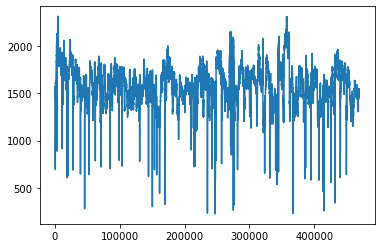

In [70]:
plt.plot(pupil)

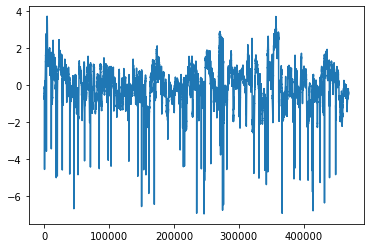

In [250]:
Zscore=(pupil-np.mean(pupil))/np.std(pupil)
plt.plot(Zscore)

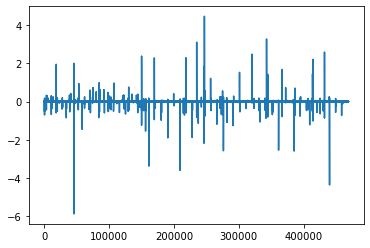

In [74]:
plt.plot(np.diff(Zscore))

In [251]:
PupilFilt=np.copy(pupil)
PupilFilt=np.float32(PupilFilt)
PupilFilt[Zscore<-2]=np.NAN

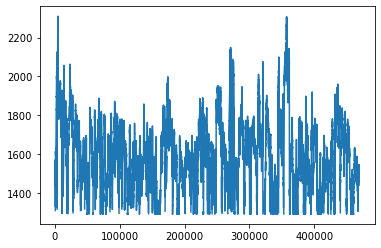

In [95]:
plt.plot(PupilFilt)

In [252]:

#PupiltFilt[np.isnan(PupilFilt)]

8461


(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 6.0000e+00,
        3.7400e+02, 4.9686e+05, 1.6000e+01, 3.0000e+00, 2.0000e+00]),
 array([-889. , -746.8, -604.6, -462.4, -320.2, -178. ,  -35.8,  106.4,
         248.6,  390.8,  533. ]),
 <BarContainer object of 10 artists>)

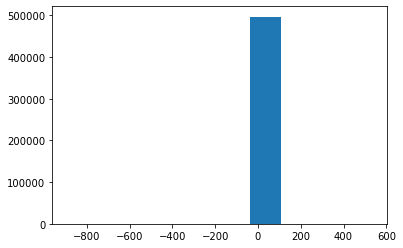

In [153]:
#lt.hist(np.diff(pupil))

Text(0, 0.5, 'pupil size (a.u.)')

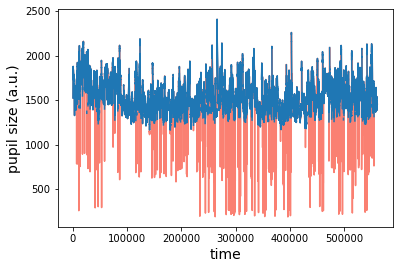

In [119]:

plt.plot(pupil,color='salmon')
plt.plot(filt)
plt.xlabel('time',fontsize=14)
plt.ylabel('pupil size (a.u.)',fontsize=14)

In [120]:
ratio

0.0269841411182248

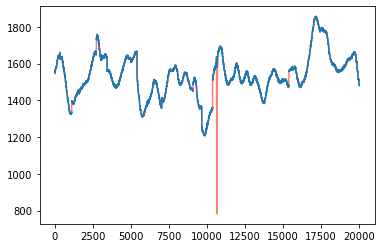

In [257]:
plt.plot(pupil[Start:Start+N],color='salmon')
plt.plot(PupilFilt[Start:Start+N])

Text(0, 0.5, 'pupil size (a.u.)')

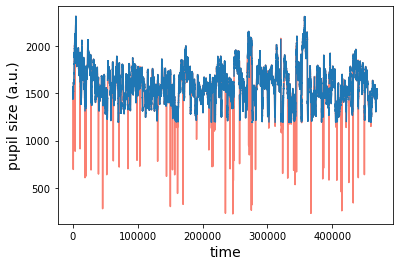

In [258]:
plt.plot(pupil,color='salmon')
plt.plot(PupilFilt)
plt.xlabel('time',fontsize=14)
plt.ylabel('pupil size (a.u.)',fontsize=14)

In [259]:
np.sum(np.isfinite(PupilFilt))

458239

In [260]:
np.sum(np.isfinite(PupilFilt)==False)

11062

In [261]:
np.sum(np.isfinite(PupilFilt)==False)/len(PupilFilt)

0.023571226142710115

In [297]:
354*14000

4956000

In [299]:
370*30000

11100000